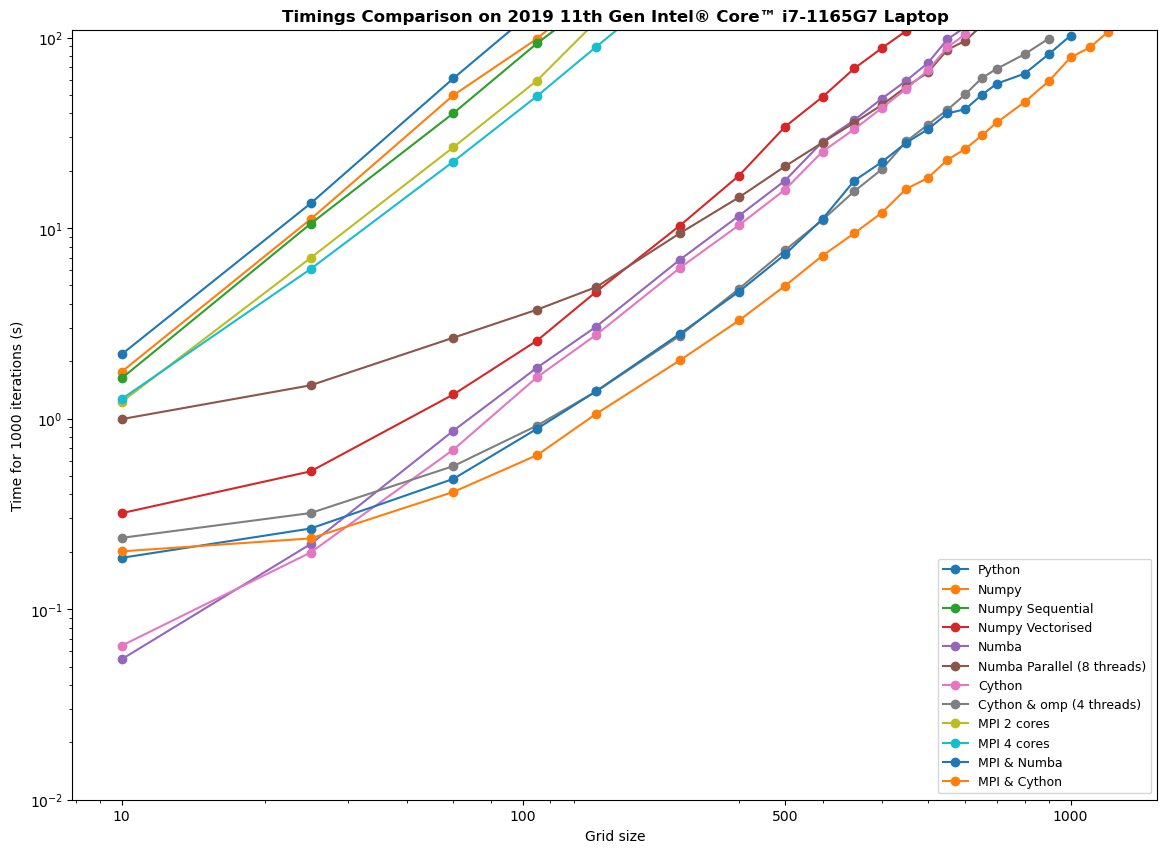

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("Timings.csv")

plt.figure(figsize=(14,10))
for col in data.columns[1:]:
    if not col.endswith("_error"):
        plt.plot(data["grid_size"], data[col], marker='o', label=col)

plt.xscale('log')
plt.yscale('log')

plt.xticks([10, 70, 250, 1000], ['10', '100', '500', '1000'])  

plt.ylim(0.01, 110)
plt.title("Timings Comparison on 2019 11th Gen Intel® Core™ i7-1165G7 Laptop", fontsize=12, weight='bold')
plt.xlabel("Grid size")
plt.ylabel("Time for 1000 iterations (s)")
plt.legend(fontsize=9)
plt.show()


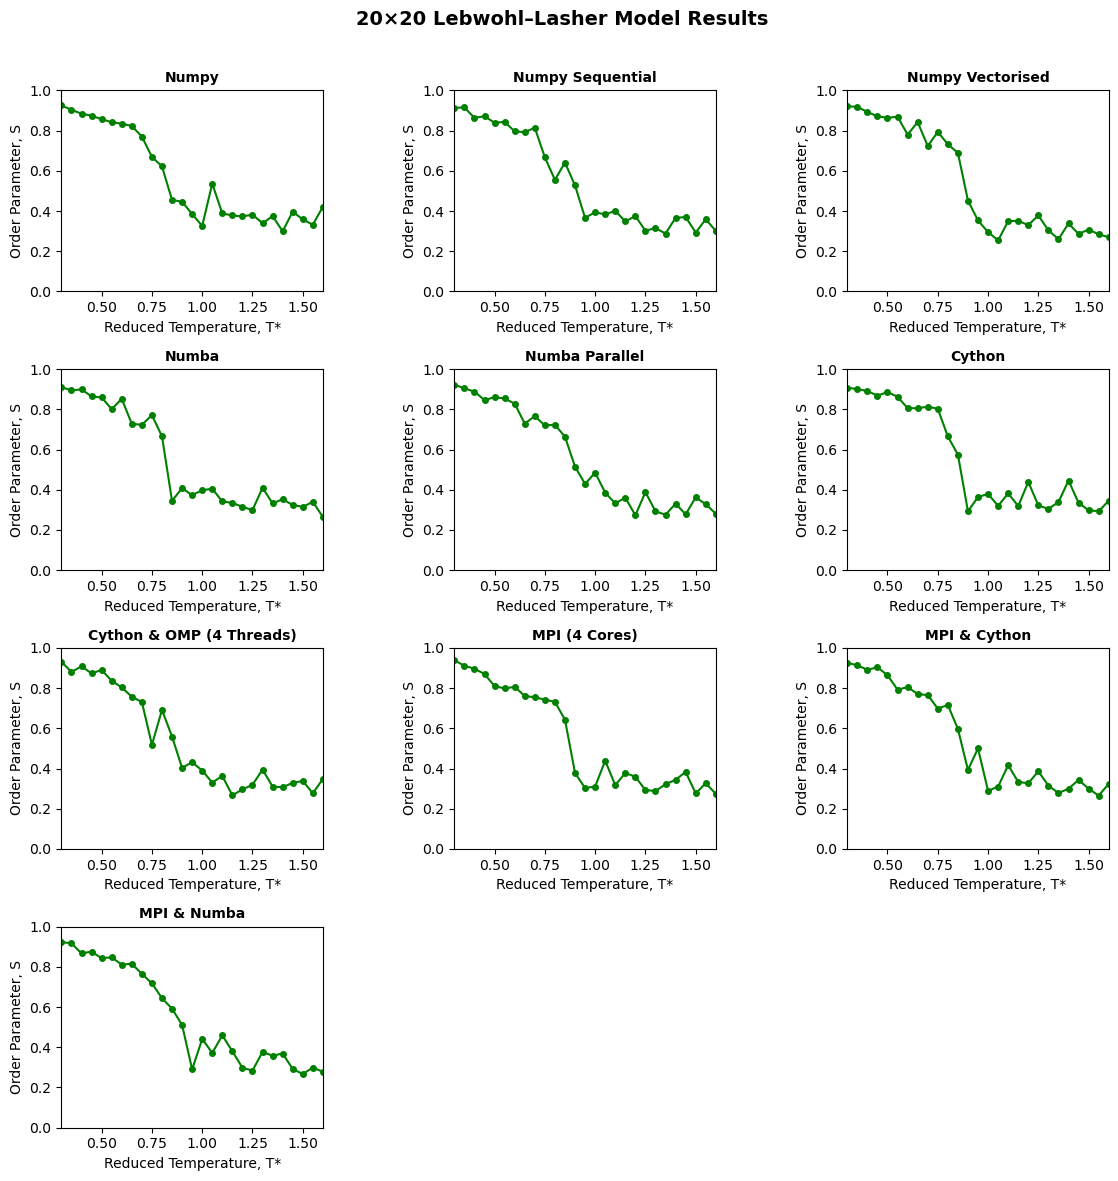

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

csv_files = [
    "numpy_results.csv",
    "numpy_sequential_results.csv",
    "numpy_vec_results.csv",
    "numba_results.csv",
    "numba_parallel_results.csv",
    "cython_results.csv",
    "cython_omp_results.csv",
    "mpi_results.csv",
    "mpi_cython_results.csv",
    "mpi_numba_results.csv"
]

labels = {
    "numpy_results.csv": "Numpy",
    "numpy_sequential_results.csv": "Numpy Sequential",
    "numpy_vec_results.csv": "Numpy Vectorised",
    "numba_results.csv": "Numba",
    "numba_parallel_results.csv": "Numba Parallel",
    "cython_results.csv": "Cython",
    "cython_omp_results.csv": "Cython & OMP (4 Threads)",
    "mpi_results.csv": "MPI (4 Cores)",
    "mpi_cython_results.csv": "MPI & Cython",
    "mpi_numba_results.csv": "MPI & Numba"
}

cols = 3
rows = math.ceil(len(csv_files) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    ax = axes[i]

    ax.errorbar(df["T*"], df["Order"], fmt='-o', color='green', ecolor='black', capsize=3, markersize=4)
    ax.set_title(labels[file], fontsize=10, fontweight='bold')
    ax.set_xlabel("Reduced Temperature, T*")
    ax.set_ylabel("Order Parameter, S")
    ax.set_ylim(0, 1)
    ax.set_xlim(df["T*"].min(), df["T*"].max())
    ax.set_aspect('equal', adjustable='box')  
    ax.grid(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("20×20 Lebwohl–Lasher Model Results", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


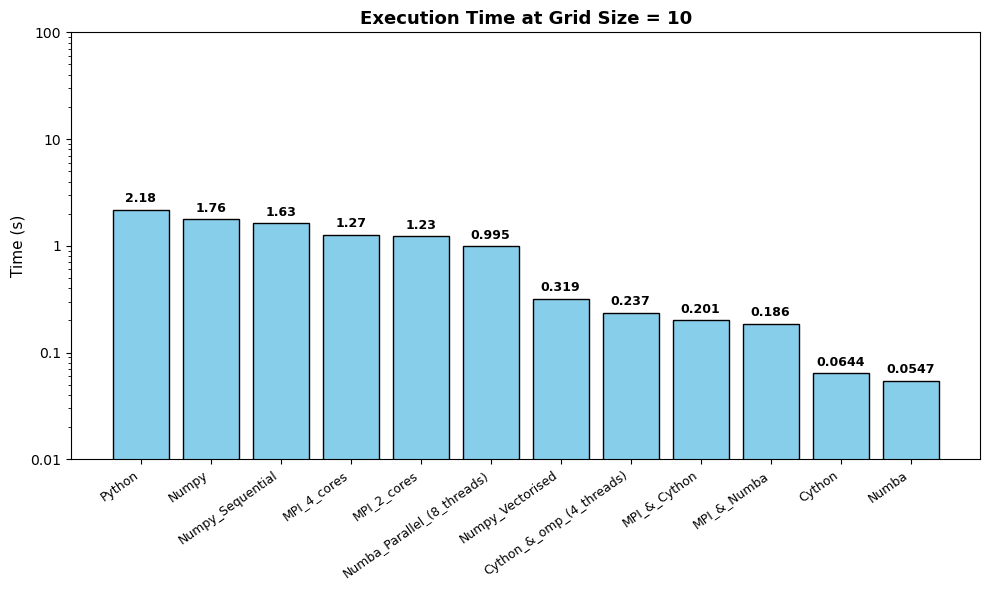

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Timings.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

df_10 = df[df["grid_size"] == 10].iloc[0]

timing_cols = [c for c in df.columns if c != "grid_size" and "_error" not in c]
timing_values = df_10[timing_cols].astype(float)

plot_df = pd.DataFrame({"Code": timing_cols, "Time (s)": timing_values.values})
plot_df = plot_df.sort_values(by="Time (s)", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df["Code"], plot_df["Time (s)"], color="skyblue", edgecolor="black")
plt.yscale("log")

for i, (label, val) in enumerate(zip(plot_df["Code"], plot_df["Time (s)"])):
    plt.text(i, val * 1.1, f"{val:.3g}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xticks(rotation=35, ha='right', fontsize=9)
plt.ylabel("Time (s)", fontsize=11)
plt.yticks([0.01, 0.1, 1, 10, 100], ["0.01", "0.1", "1", "10", "100"])
plt.title("Execution Time at Grid Size = 10", fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()




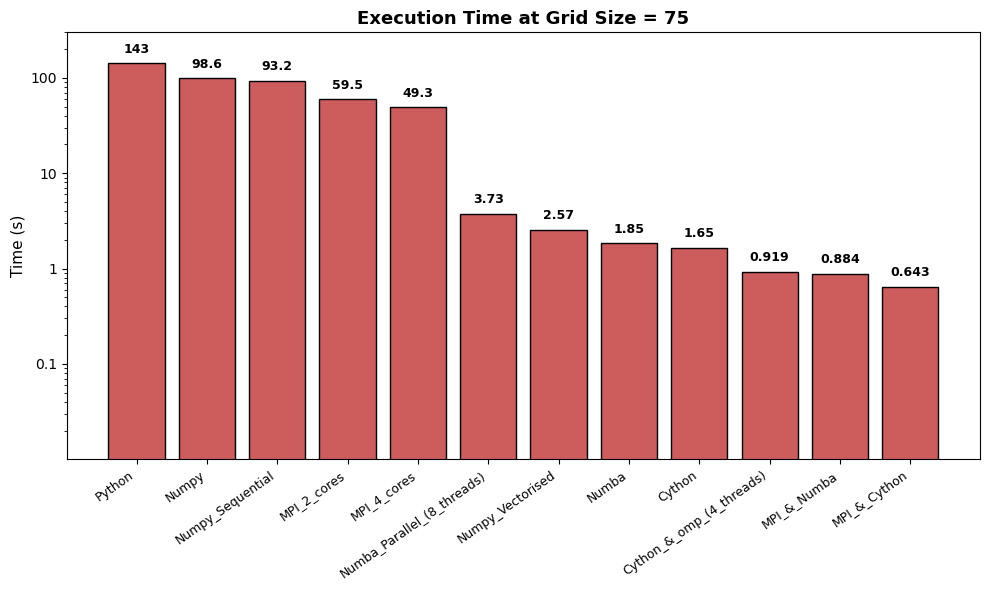

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Timings.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

df_75 = df[df["grid_size"] == 75].iloc[0]

timing_cols = [c for c in df.columns if c != "grid_size" and "_error" not in c]
timing_values = df_75[timing_cols].astype(float)

plot_df = pd.DataFrame({"Code": timing_cols, "Time (s)": timing_values.values})
plot_df = plot_df.sort_values(by="Time (s)", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df["Code"], plot_df["Time (s)"], color="indianred", edgecolor="black")
plt.yscale("log")

for i, (label, val) in enumerate(zip(plot_df["Code"], plot_df["Time (s)"])):
    plt.text(i, val * 1.2, f"{val:.3g}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xticks(rotation=35, ha='right', fontsize=9)
plt.ylabel("Time (s)", fontsize=11)
plt.yticks([0.1, 1, 10, 100], ["0.1", "1", "10", "100"])
plt.title("Execution Time at Grid Size = 75", fontsize=13, fontweight="bold")

plt.ylim(0.01, 300)
plt.tight_layout()
plt.show()



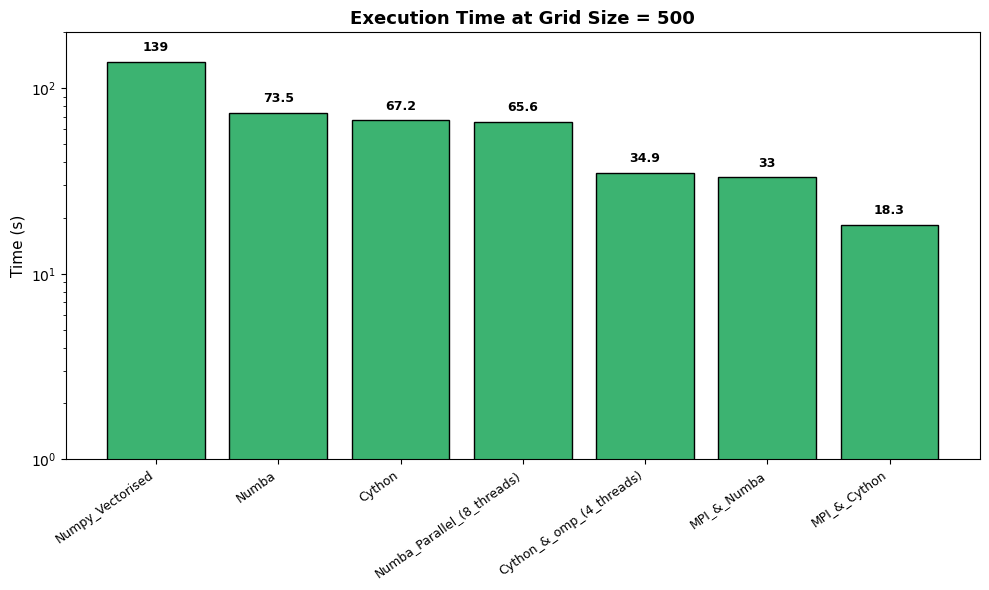

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogFormatterMathtext

df = pd.read_csv("Timings.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

GRID_SIZE = 500
if GRID_SIZE not in df["grid_size"].values:
    raise ValueError(f"Grid size {GRID_SIZE} not found in Timings.csv")

df_sel = df[df["grid_size"] == GRID_SIZE].iloc[0]
timing_cols = [c for c in df.columns if c != "grid_size" and "_error" not in c]
timing_values = df_sel[timing_cols].dropna().astype(float)

plot_df = pd.DataFrame({"Code": timing_values.index, "Time (s)": timing_values.values})
plot_df = plot_df.sort_values(by="Time (s)", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df["Code"], plot_df["Time (s)"], color="mediumseagreen", edgecolor="black")
plt.yscale("log")

for i, (label, val) in enumerate(zip(plot_df["Code"], plot_df["Time (s)"])):
    plt.text(i, val * 1.1, f"{val:.3g}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xticks(rotation=35, ha='right', fontsize=9)
plt.ylabel("Time (s)", fontsize=11)
plt.title(f"Execution Time at Grid Size = {GRID_SIZE}", fontsize=13, fontweight="bold")

plt.gca().yaxis.set_major_formatter(LogFormatterMathtext())
plt.yticks([1, 10, 100])
plt.ylim(1, 200)

plt.tight_layout()
plt.show()


